### Extracción de datos desde la API de RAWG
Este notebook contiene la función encargada de extraer los datos desde la API pública de RAWG, la cual será utilizada por todos los miembros del grupo para responder a sus respectivas subpreguntas.

La función obtener_juegos_por_anio() permite recopilar información de videojuegos publicados entre un rango de años, devolviendo un DataFrame con los campos proporcionados por la API.
Además la función juegos_json() permite guardar los resultados en un archivo .json dentro del directorio ../data/raw/ para su posterior procesamiento.

In [253]:
import requests
import pandas as pd
from tqdm import tqdm
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [255]:
API_KEY = "9e9ab06256174d82a01dc73f02418ca2"

def obtener_juegos_por_anio(inicio=2015, fin=2024):
    juegos_lista = []
    for year in range(inicio, fin + 1):
        for page in range(1, 6):
            url = f"https://api.rawg.io/api/games?key={API_KEY}&dates={year}-01-01,{year}-12-31&page_size=40&page={page}"
            r = requests.get(url)
            if r.status_code == 200:
                juegos = r.json()['results']
                juegos_lista.extend(juegos)
                time.sleep(1)
            else:
                print(f"Error en el año {year}, página {page}")
    return pd.json_normalize(juegos_lista)


In [323]:
df=pd.read_json("../../data/raw/juegos_rawg.json")

### Limpieza y tratamiento del DataFrame para las plataformas

Para analizar la relación entre las plataformas y la cantidad de juegos que pueden tener o valorando la puntación de los juegos en las plataformas. Nos interesa las columnas: 
- Platforms: Nombre de las plataformas que está disponible los juegos.
- Rating: Valoración de cada juego.
- Released: Fecha de salida de cada juego.

La columnsa "relasead" nos interesa solamente el año en el que sale cada juego, por lo que crearemos una nueva columna en base a esta llamada "año", l cual nos quedará un datetime con únicamente el año.


In [326]:
df['año'] = pd.to_datetime(df['released'], errors='coerce').dt.year
df = df.dropna(subset=['año'])
df['año'] = df['año'].astype(int)
df

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,added_by_status.dropped,added_by_status.playing,esrb_rating.id,esrb_rating.name,esrb_rating.slug,esrb_rating.name_en,esrb_rating.name_ru,esrb_rating,community_rating,año
0,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,43,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,...,991.0,892.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
1,life-is-strange-episode-1-2,Life is Strange,6,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-01-29,False,https://media.rawg.io/media/games/562/56255381...,4.12,5,...,659.0,152.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
2,fallout-4,Fallout 4,38,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-09,False,https://media.rawg.io/media/games/d82/d82990b9...,3.81,4,...,1362.0,322.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
3,rocket-league,Rocket League,21,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-07-07,False,https://media.rawg.io/media/games/8cc/8cce7c0e...,3.93,4,...,1676.0,542.0,1.0,Everyone,everyone,Everyone,Для всех,NaN,NaN,2015
4,rise-of-the-tomb-raider,Rise of the Tomb Raider,14,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-10,False,https://media.rawg.io/media/games/b45/b45575f3...,4.04,4,...,431.0,158.0,NaN,None,None,None,None,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,dark-hours-prologue,Dark Hours: Prologue,2,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-07-18,False,https://media.rawg.io/media/screenshots/c16/c1...,0.00,0,...,NaN,NaN,NaN,None,None,None,None,NaN,0.0,2024
1996,age-of-water-the-first-voyage,Age of Water: The First Voyage,1,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-03-21,False,https://media.rawg.io/media/screenshots/721/72...,0.00,0,...,NaN,NaN,NaN,None,None,None,None,NaN,0.0,2024
1997,legacy-of-kaintm-soul-reaver-12-remastered,Legacy of Kain™ Soul Reaver 1&2 Remastered,0,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-12-10,False,https://media.rawg.io/media/games/e03/e03a08a3...,0.00,5,...,1.0,NaN,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2024
1998,south-park-snow-day,SOUTH PARK: SNOW DAY!,4,"[{'platform': {'id': 4, 'name': 'PC', 'slug': ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-03-25,False,https://media.rawg.io/media/screenshots/f90/f9...,2.36,1,...,7.0,NaN,NaN,None,None,None,None,NaN,NaN,2024


La columna platforms tiene una lista de diccionarios la cual dificulta la extracción de esta. 
Para esto creamos una función que depure los datos y extraiga los nombres de las plataformas dentro de ella. Luego los une en una cadena de texto.

In [329]:
def extraer_nombres_plataformas(plataformas):
    return ', '.join([item['platform']['name'] for item in plataformas])

df['platforms'] = df['platforms'].apply(extraer_nombres_plataformas)
df

,slug,name,playtime,platforms,stores,released,tba,background_image,rating,rating_top,...,added_by_status.dropped,added_by_status.playing,esrb_rating.id,esrb_rating.name,esrb_rating.slug,esrb_rating.name_en,esrb_rating.name_ru,esrb_rating,community_rating,año
0,the-witcher-3-wild-hunt,The Witcher 3: Wild Hunt,43,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-05-18,False,https://media.rawg.io/media/games/618/618c2031...,4.65,5,...,991.0,892.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
1,life-is-strange-episode-1-2,Life is Strange,6,"PC, PlayStation 4, Xbox One, iOS, Android, mac...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-01-29,False,https://media.rawg.io/media/games/562/56255381...,4.12,5,...,659.0,152.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
2,fallout-4,Fallout 4,38,"PC, PlayStation 5, Xbox One, PlayStation 4","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-09,False,https://media.rawg.io/media/games/d82/d82990b9...,3.81,4,...,1362.0,322.0,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2015
3,rocket-league,Rocket League,21,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-07-07,False,https://media.rawg.io/media/games/8cc/8cce7c0e...,3.93,4,...,1676.0,542.0,1.0,Everyone,everyone,Everyone,Для всех,NaN,NaN,2015
4,rise-of-the-tomb-raider,Rise of the Tomb Raider,14,"PC, Xbox One, PlayStation 4, macOS","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2015-11-10,False,https://media.rawg.io/media/games/b45/b45575f3...,4.04,4,...,431.0,158.0,NaN,None,None,None,None,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,dark-hours-prologue,Dark Hours: Prologue,2,PC,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-07-18,False,https://media.rawg.io/media/screenshots/c16/c1...,0.00,0,...,NaN,NaN,NaN,None,None,None,None,NaN,0.0,2024
1996,age-of-water-the-first-voyage,Age of Water: The First Voyage,1,PC,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-03-21,False,https://media.rawg.io/media/screenshots/721/72...,0.00,0,...,NaN,NaN,NaN,None,None,None,None,NaN,0.0,2024
1997,legacy-of-kaintm-soul-reaver-12-remastered,Legacy of Kain™ Soul Reaver 1&2 Remastered,0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...","[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-12-10,False,https://media.rawg.io/media/games/e03/e03a08a3...,0.00,5,...,1.0,NaN,4.0,Mature,mature,Mature,С 17 лет,NaN,NaN,2024
1998,south-park-snow-day,SOUTH PARK: SNOW DAY!,4,PC,"[{'store': {'id': 1, 'name': 'Steam', 'slug': ...",2024-03-25,False,https://media.rawg.io/media/screenshots/f90/f9...,2.36,1,...,7.0,NaN,NaN,None,None,None,None,NaN,NaN,2024


Creamos un array con todas las plataformas y lo añadimos a un set para que no tenga valores repetidos. Esto proporciona una lista de todas las plataformas y cambiamos el tipo de dato a una lista para facilitar el uso de esta.

In [332]:
df3= df["platforms"].unique()
lista_unica = ', '.join(df3).split(', ')
lista_unica=set(lista_unica)
lista_unica=list(lista_unica)
print(lista_unica)

['iOS', 'PlayStation 4', 'Classic Macintosh', 'PSP', 'Web', 'Wii U', 'PlayStation 5', 'Xbox 360', 'PS Vita', 'PC', 'Wii', 'Linux', 'Nintendo 3DS', 'Xbox One', 'Nintendo Switch', 'Nintendo DS', 'PlayStation 3', 'Android', 'Xbox Series S/X', 'macOS']


### Limpieza de número de juegos por plataformas.

Creamos una tabla con los datos que vamos a trabajar. En este caso "platforms" y el año de salida del juego.

In [335]:
df2=df[["platforms","año"]]
df2

,platforms,año
0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2015
1,"PC, PlayStation 4, Xbox One, iOS, Android, mac...",2015
2,"PC, PlayStation 5, Xbox One, PlayStation 4",2015
3,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...",2015
4,"PC, Xbox One, PlayStation 4, macOS",2015
...,...,...
1995,PC,2024
1996,PC,2024
1997,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2024
1998,PC,2024


Usamos np.where(...) para verificar si la columna "platforms" contiene cada elemento de la lista. Si lo contiene, asigna 1, de lo contrario, asigna  0

In [338]:
df2=df2.copy()
for x in lista_unica:
    df2[x]=np.where(df2["platforms"].str.contains(x),1,0)
df2

,platforms,año,iOS,PlayStation 4,Classic Macintosh,PSP,Web,Wii U,PlayStation 5,Xbox 360,...,Wii,Linux,Nintendo 3DS,Xbox One,Nintendo Switch,Nintendo DS,PlayStation 3,Android,Xbox Series S/X,macOS
0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2015,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,1
1,"PC, PlayStation 4, Xbox One, iOS, Android, mac...",2015,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,1
2,"PC, PlayStation 5, Xbox One, PlayStation 4",2015,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...",2015,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
4,"PC, Xbox One, PlayStation 4, macOS",2015,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PC,2024,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,PC,2024,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2024,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1998,PC,2024,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Como no nos interesa los 0, para evitar posibles errores sustituimos los 0 por NaN. Así indicando que el valor está vacío.

In [341]:
df2.replace(0, np.nan, inplace=True)
df2

,platforms,año,iOS,PlayStation 4,Classic Macintosh,PSP,Web,Wii U,PlayStation 5,Xbox 360,...,Wii,Linux,Nintendo 3DS,Xbox One,Nintendo Switch,Nintendo DS,PlayStation 3,Android,Xbox Series S/X,macOS
0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2015,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0
1,"PC, PlayStation 4, Xbox One, iOS, Android, mac...",2015,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0
2,"PC, PlayStation 5, Xbox One, PlayStation 4",2015,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...",2015,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
4,"PC, Xbox One, PlayStation 4, macOS",2015,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PC,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,PC,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",2024,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1998,PC,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de valoraciones por plataformas.

Creamos una tabla con los datos que vamos a trabajar. En este caso "platforms" , el año de salida y valoración del juego.

In [344]:
df3=df[["platforms","rating","año"]]
df3

,platforms,rating,año
0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.65,2015
1,"PC, PlayStation 4, Xbox One, iOS, Android, mac...",4.12,2015
2,"PC, PlayStation 5, Xbox One, PlayStation 4",3.81,2015
3,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...",3.93,2015
4,"PC, Xbox One, PlayStation 4, macOS",4.04,2015
...,...,...,...
1995,PC,0.00,2024
1996,PC,0.00,2024
1997,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",0.00,2024
1998,PC,2.36,2024


Como se realizó anteriormente el np.where(...) verifica si la columna "platforms" contiene cada elemento de la lista. Si lo contiene, asigna la valoración del juego, de lo contrario, asigna  0. Posteriormente sustituimos el 0 por un NaN

In [347]:
df3=df3.copy()
for x in lista_unica:
    df3[x] = np.where(df3["platforms"].str.contains(x, na=False), df3["rating"], 0)
df3

,platforms,rating,año,iOS,PlayStation 4,Classic Macintosh,PSP,Web,Wii U,PlayStation 5,...,Wii,Linux,Nintendo 3DS,Xbox One,Nintendo Switch,Nintendo DS,PlayStation 3,Android,Xbox Series S/X,macOS
0,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",4.65,2015,0.00,4.65,0.0,0.0,0.0,0.0,4.65,...,0.0,0.00,0.0,4.65,4.65,0.0,0.00,0.00,4.65,4.65
1,"PC, PlayStation 4, Xbox One, iOS, Android, mac...",4.12,2015,4.12,4.12,0.0,0.0,0.0,0.0,0.00,...,0.0,4.12,0.0,4.12,0.00,0.0,4.12,4.12,0.00,4.12
2,"PC, PlayStation 5, Xbox One, PlayStation 4",3.81,2015,0.00,3.81,0.0,0.0,0.0,0.0,3.81,...,0.0,0.00,0.0,3.81,0.00,0.0,0.00,0.00,0.00,0.00
3,"PC, Xbox One, PlayStation 4, Nintendo Switch, ...",3.93,2015,0.00,3.93,0.0,0.0,0.0,0.0,0.00,...,0.0,3.93,0.0,3.93,3.93,0.0,0.00,0.00,0.00,3.93
4,"PC, Xbox One, PlayStation 4, macOS",4.04,2015,0.00,4.04,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,4.04,0.00,0.0,0.00,0.00,0.00,4.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PC,0.00,2024,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1996,PC,0.00,2024,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997,"PC, PlayStation 5, Xbox One, PlayStation 4, Xb...",0.00,2024,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1998,PC,2.36,2024,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00


In [349]:
df3.drop(columns=["platforms","rating"],inplace=True)


In [351]:
df3.replace(0, np.nan, inplace=True)


### Filtrado de valoración de las plataformas por año.

Creamos la tabla para visualizar la media de valoración de juegos por plataforma.

Este código agrupa los datos de df3 por año y calcula el promedio de uso de varias plataformas de videojuegos. Luego, divide los resultados en dos grupos:
- df_grupo1: Datos entre 2015 y 2019.
- df_grupo2: Datos entre 2020 y 2024.

In [354]:
df_valo = df3.groupby("año")[['PlayStation 4', 'Xbox One', 'Nintendo Switch', 'PC', 'Nintendo 3DS', 'Wii U',
                                 'PlayStation 5', 'PlayStation 3', 'PS Vita', 'Xbox Series S/X', 'Classic Macintosh',
                                 'macOS', 'Android', 'iOS', 'Linux', 'Wii', 'Nintendo DS', 'Web', 'PSP', 'Xbox 360']].mean()
df_grupo1 = df_valo.loc[(df_valo.index >= 2015) & (df_valo.index <= 2019)]

df_grupo2 = df_valo.loc[(df_valo.index >= 2020) & (df_valo.index <= 2024)]
print(df_grupo1,df_grupo2)

      PlayStation 4  Xbox One  Nintendo Switch        PC  Nintendo 3DS  \
año                                                                      
2015       3.616148  3.614082         3.663448  3.399223        3.7800   
2016       3.652446  3.641260         3.718831  3.493927        3.3075   
2017       3.613429  3.566721         3.643846  3.414263        4.1850   
2018       3.600949  3.608485         3.694510  3.512143           NaN   
2019       3.574462  3.556231         3.672600  3.466053           NaN   

         Wii U  PlayStation 5  PlayStation 3   PS Vita  Xbox Series S/X  \
año                                                                       
2015  3.763333       4.116667       3.669231  3.648182         4.293333   
2016  3.136000       4.054000       3.630909  3.480000         4.112500   
2017  4.490000       3.660000       4.250000  4.032000         3.535000   
2018       NaN       4.025556       3.820000  3.750000         3.987778   
2019       NaN       3.888750  

Extraemos los datos y añadimos a un json para facilitar el uso de estos.

In [357]:
df_valo.to_json("../../data/processed/valoracion_plataforma.json", index=False)

### Filtrado de cantidad de juegos

Creamos la tabla para visualizar la cantidad de juegos por plataforma.

Este código agrupa el DataFrame df2 por el año y suma los valores de distintas plataformas de videojuegos. 
Así, obtienes el total de cada plataforma por año, en lugar del promedio que calculabas antes.

In [365]:
df_grouped = df2.groupby("año")[['PlayStation 4', 'Xbox One', 'Nintendo Switch', 'PC', 'Nintendo 3DS', 'Wii U',
                                 'PlayStation 5', 'PlayStation 3', 'PS Vita', 'Xbox Series S/X', 'Classic Macintosh',
                                 'macOS', 'Android', 'iOS', 'Linux', 'Wii', 'Nintendo DS', 'Web', 'PSP', 'Xbox 360']].sum()

print(df_grouped)


      PlayStation 4  Xbox One  Nintendo Switch     PC  Nintendo 3DS  Wii U  \
año                                                                          
2015          122.0      98.0             58.0  193.0           3.0    6.0   
2016          139.0     127.0             77.0  191.0           4.0    5.0   
2017          140.0     122.0             91.0  190.0           2.0    1.0   
2018          137.0     132.0            102.0  196.0           0.0    0.0   
2019          130.0     130.0            101.0  191.0           0.0    0.0   
2020          120.0     123.0             94.0  197.0           0.0    0.0   
2021          104.0     116.0             80.0  197.0           0.0    0.0   
2022           79.0      82.0             63.0  194.0           0.0    0.0   
2023           55.0      40.0             46.0  193.0           0.0    0.0   
2024           22.0      20.0             24.0  193.0           0.0    0.0   

      PlayStation 5  PlayStation 3  PS Vita  Xbox Series S/X  \

### Visualización de las valoraciones de juegos en las distintas plataformas

Este código usa seaborn y matplotlib para visualizar la evolución de la valoración de plataformas de videojuegos a lo largo del tiempo:
Estilo visual: Se define el estilo darkgrid para mejorar la apariencia del gráfico.
Figura: Se crea una figura de tamaño (12, 6), ajustando la dimensión del gráfico.
Gráfico de líneas: Se traza la evolución de df_grupo1, usando marcadores (o) y una paleta de colores variada (rainbow).
Etiquetas y título: Se personalizan los ejes y el título para mayor claridad.
Leyenda: Se ubica la leyenda a la derecha para visualizar mejor las distintas plataformas.
Mostrar el gráfico: Se usa plt.show() para generar la visualización.

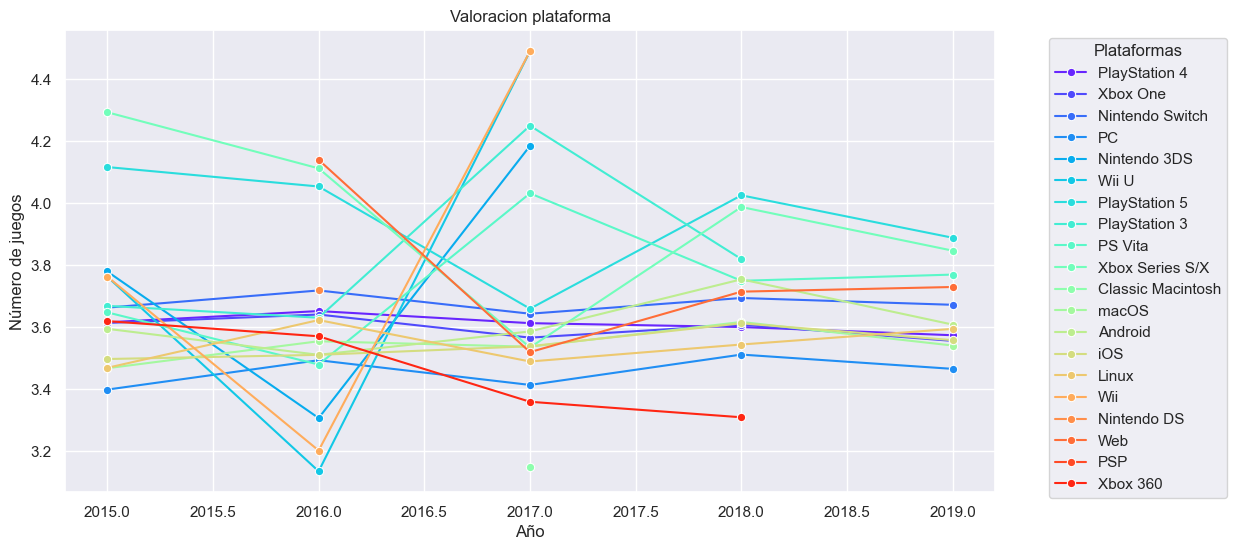

In [360]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grupo1, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Valoracion plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Para que sea más visual divimos el gráfico a la mitad.

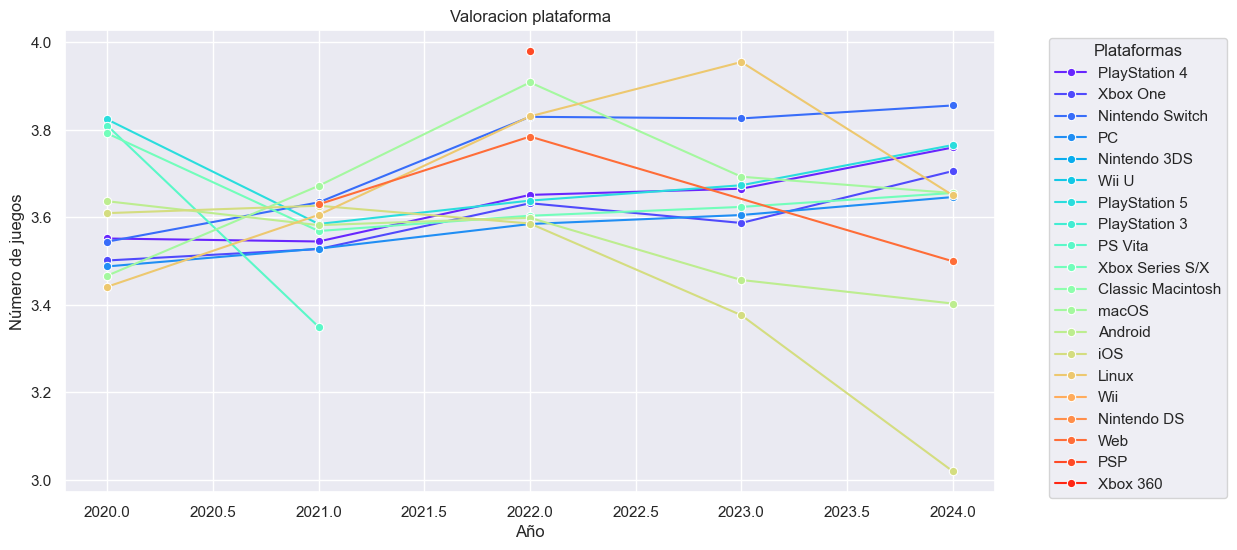

In [362]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grupo2, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Valoracion plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Extraemos los datos y añadimos a un json para facilitar el uso de estos.

In [367]:
df_grouped.to_json("../../data/processed/juegos_plataforma.json", index=False)

### Visualización de la cantidad de juegos lanzados por plataforma a lo largo de los años:

- Establece el estilo darkgrid para un fondo con líneas sutiles.
- Crea una figura de tamaño (12,6), optimizando la visualización.
- Grafica los datos de df_grouped con líneas, marcadores (o) y una paleta de colores variada (rainbow).
- Personaliza los ejes y título para mejorar la claridad del gráfico.
- Agrega una leyenda con las plataformas a la derecha del gráfico.
- Muestra el gráfico

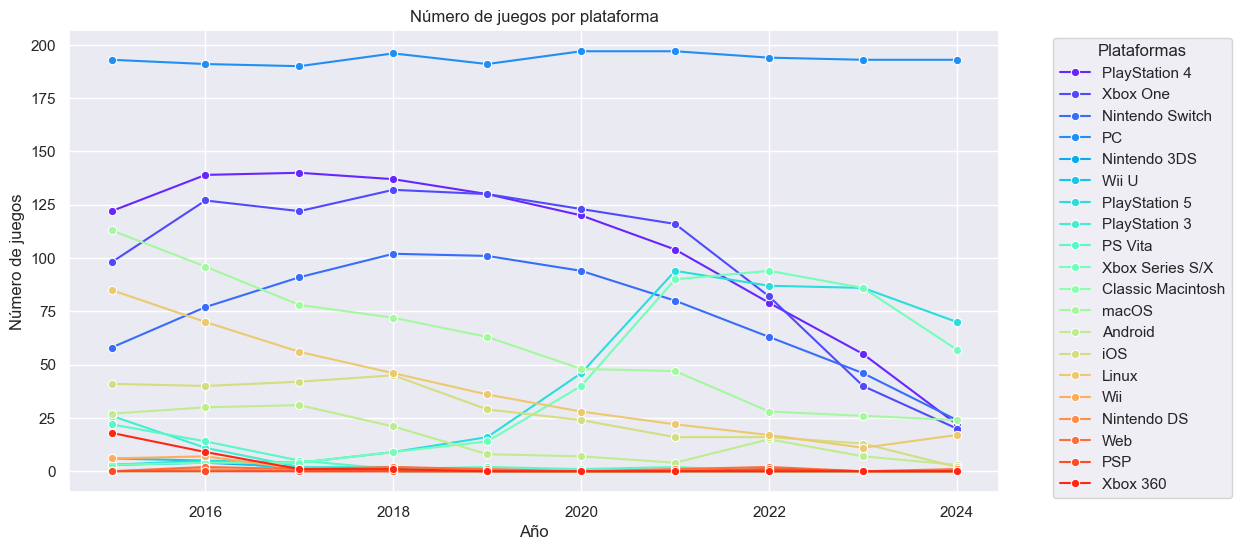

In [369]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))

sns.lineplot(data=df_grouped, dashes=False, marker="o", palette="rainbow")

plt.xlabel("Año")
plt.ylabel("Número de juegos")
plt.title("Número de juegos por plataforma")
plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
